# KnitHAT 

This notebook is step five in the process of building [KnitHAT](http://knithat.works), which recommends hat patterns from Ravelry based on user-uploaded images. KnitHAT was my Insight Data Science fellowship project, and was built in only three weeks.

This code merges all the information on each pattern into one clean dataset and contains some visualization of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
c1 = pd.read_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/cat_att_csvs/cat_att_csv7000.csv')

In [4]:
c1.head()

,pattern_id,pattern_name,category,attribute,felted,tassel,stripes,bobble-or-popcorn,cables,eyelets,...,child,toddler,ribbed,slipped-stitches,textured,twisted-stitches,fairisle,stranded,appliqued,norwegian
0,794220,F835 Inside-Out Blanket,Baby Blanket,"{""id"":204,""permalink"":""one-piece""},{""id"":267,""...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,925292,Fiddlehead Toque,"Beanie, Toque","{""id"":10,""permalink"":""adult""},{""id"":181,""perma...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,925295,Bonnet Eden,"Beanie, Toque","{""id"":3,""permalink"":""unisex""},{""id"":4,""permali...",0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
3,7793,Popcorn Stitch Hat,"Beanie, Toque","{""id"":3,""permalink"":""unisex""},{""id"":10,""permal...",0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,7795,Baby Wood Nymph Hat,"Beanie, Toque","{""id"":4,""permalink"":""baby""},{""id"":5,""permalink...",0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
c2 = pd.read_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/cat_att_csvs/cat_att_csv9000.csv')

In [6]:
c2.head()

,pattern_id,pattern_name,category,attribute,felted,tassel,stripes,bobble-or-popcorn,cables,eyelets,...,child,toddler,ribbed,slipped-stitches,textured,twisted-stitches,fairisle,stranded,appliqued,norwegian
0,928355,Festival Hat,"Beanie, Toque","{""id"":1,""permalink"":""male""},{""id"":2,""permalink...",0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,928356,Atlantic DK Hat 1153,Brimmed,"{""id"":164,""permalink"":""doubleknit""},{""id"":204,...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10855,Colleen's Cap,"Beanie, Toque","{""id"":3,""permalink"":""unisex""},{""id"":10,""permal...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,141928,Handpainted Mitered Square Hat,"Beanie, Toque","{""id"":10,""permalink"":""adult""},{""id"":267,""perma...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,797287,Tributary Hat,"Beanie, Toque","{""id"":3,""permalink"":""unisex""},{""id"":9,""permali...",0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
c3 = pd.read_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/cat_att_csvs/cat_att_csv11000.csv')

In [8]:
c3.head()

,pattern_id,pattern_name,category,attribute,felted,tassel,stripes,bobble-or-popcorn,cables,eyelets,...,child,toddler,ribbed,slipped-stitches,textured,twisted-stitches,fairisle,stranded,appliqued,norwegian
0,2776.0,Hoodwink - Hooded infinity scarf,Scarf,"{""id"":2,""permalink"":""female""},{""id"":9,""permali...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5382.0,Adelia Beanie,"Beanie, Toque","{""id"":9,""permalink"":""teen""},{""id"":10,""permalin...",0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,931435.0,Fox Hat and Mittens,Mittens,"{""id"":181,""permalink"":""stranded""},{""id"":267,""p...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,367.0,gavroche hat,"Beanie, Toque","{""id"":204,""permalink"":""one-piece""},{""id"":212,""...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13936.0,Tam,"Beret, Tam","{""id"":2,""permalink"":""female""},{""id"":8,""permali...",0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
c3['pattern_id'] = c3['pattern_id'].astype(str)
c3['pattern_id'] = c3['pattern_id'].str.replace('.0', '') # finally

In [10]:
c3.head()

,pattern_id,pattern_name,category,attribute,felted,tassel,stripes,bobble-or-popcorn,cables,eyelets,...,child,toddler,ribbed,slipped-stitches,textured,twisted-stitches,fairisle,stranded,appliqued,norwegian
0,2776,Hoodwink - Hooded infinity scarf,Scarf,"{""id"":2,""permalink"":""female""},{""id"":9,""permali...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5382,Adelia Beanie,"Beanie, Toque","{""id"":9,""permalink"":""teen""},{""id"":10,""permalin...",0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,931435,Fox Hat and Mittens,Mittens,"{""id"":181,""permalink"":""stranded""},{""id"":267,""p...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,367,gavroche hat,"Beanie, Toque","{""id"":204,""permalink"":""one-piece""},{""id"":212,""...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13936,Tam,"Beret, Tam","{""id"":2,""permalink"":""female""},{""id"":8,""permali...",0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
c4 = pd.read_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/cat_att_csvs/cat_att_csv12000.csv')

In [12]:
c4.head()

,pattern_id,pattern_name,category,attribute,felted,tassel,stripes,bobble-or-popcorn,cables,eyelets,...,child,toddler,ribbed,slipped-stitches,textured,twisted-stitches,fairisle,stranded,appliqued,norwegian
0,17016,13505 Bonnet,Bonnet,"{""id"":3,""permalink"":""unisex""},{""id"":4,""permali...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,541305,Alfa lue og hals,Cowl,"{""id"":212,""permalink"":""bottom-up""},{""id"":286,""...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,279164,F145 Heaven Ribbed Scarf,Scarf,"{""id"":10,""permalink"":""adult""},{""id"":64,""permal...",0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,934524,Garter Stitch Bonnet,Bonnet,"{""id"":3,""permalink"":""unisex""},{""id"":4,""permali...",0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,934526,Baby Turban,Other,"{""id"":3,""permalink"":""unisex""},{""id"":4,""permali...",0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [13]:
p1 = pd.read_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/cleaned_csv_files/newcsv7000.csv')

In [14]:
p1.head()

,patterns,pattern_id,pattern_name,medium2_urls,author_name,medium_url,remainder,extension,ids_urls
0,"{""patterns"": {""794220"":{""comments_count"":1,""cr...",794220,F835 Inside-Out Blanket,https://images4-b.ravelrycache.com/uploads/Ply...,Plymouth Yarn Design Studio,https://images4-b.ravelrycache.com/uploads/Ply...,NaN,jpg,"(794220, 'https://images4-b.ravelrycache.com/u..."
1,"{""patterns"": {""925292"":{""comments_count"":0,""cr...",925292,Fiddlehead Toque,https://images4-b.ravelrycache.com/uploads/Ami...,Amie Moore,https://images4-b.ravelrycache.com/uploads/Ami...,"""small2_url"":""https://images4-b.ravelrycache.c...",JPG,"(925292, 'https://images4-b.ravelrycache.com/u..."
2,"{""patterns"": {""925295"":{""comments_count"":0,""cr...",925295,Bonnet Eden,https://images4-b.ravelrycache.com/uploads/des...,des Fils et des Aiguilles,https://images4-b.ravelrycache.com/uploads/des...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpg,"(925295, 'https://images4-b.ravelrycache.com/u..."
3,"{""patterns"": {""7793"":{""comments_count"":2,""crea...",7793,Popcorn Stitch Hat,https://images4-b.ravelrycache.com/uploads/rub...,pinnedtothepage,https://images4-b.ravelrycache.com/uploads/rub...,NaN,jpg,"(7793, 'https://images4-b.ravelrycache.com/upl..."
4,"{""patterns"": {""7795"":{""comments_count"":0,""crea...",7795,Baby Wood Nymph Hat,https://images4-e.ravelrycache.com/uploads/Fai...,Faith A D,https://images4-e.ravelrycache.com/uploads/Fai...,NaN,jpg,"(7795, 'https://images4-e.ravelrycache.com/upl..."


In [15]:
p2 = pd.read_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/cleaned_csv_files/newcsv9000.csv')

In [16]:
p2.head()

,patterns,pattern_id,pattern_name,medium2_urls,author_name,medium_url,remainder,extension,ids_urls
0,"{""patterns"": {""928355"":{""comments_count"":0,""cr...",928355,Festival Hat,https://images4-b.ravelrycache.com/uploads/mam...,Cecilia Losada,https://images4-b.ravelrycache.com/uploads/mam...,"""small2_url"":""https://images4-b.ravelrycache.c...",png,"(928355, 'https://images4-b.ravelrycache.com/u..."
1,"{""patterns"": {""928356"":{""comments_count"":0,""cr...",928356,Atlantic DK Hat 1153,https://images4-b.ravelrycache.com/uploads/Luc...,Lucy Neatby,https://images4-b.ravelrycache.com/uploads/Luc...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpg,"(928356, 'https://images4-b.ravelrycache.com/u..."
2,"{""patterns"": {""10855"":{""comments_count"":0,""cre...",10855,Colleen's Cap,https://images4-e.ravelrycache.com/uploads/tin...,Carole Ferguson,https://images4-e.ravelrycache.com/uploads/tin...,NaN,jpg,"(10855, 'https://images4-e.ravelrycache.com/up..."
3,"{""patterns"": {""141928"":{""comments_count"":0,""cr...",141928,Handpainted Mitered Square Hat,https://images4-e.ravelrycache.com/uploads/ath...,Heidi Sunday,https://images4-e.ravelrycache.com/uploads/ath...,NaN,jpg,"(141928, 'https://images4-e.ravelrycache.com/u..."
4,"{""patterns"": {""797287"":{""comments_count"":0,""cr...",797287,Tributary Hat,https://images4-e.ravelrycache.com/uploads/Sar...,Sarah Dawn,https://images4-e.ravelrycache.com/uploads/Sar...,NaN,JPG,"(797287, 'https://images4-e.ravelrycache.com/u..."


In [17]:
p3 = pd.read_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/cleaned_csv_files/newcsv11000.csv')

In [18]:
p3.head()

,patterns,pattern_id,pattern_name,medium2_urls,author_name,medium_url,remainder,extension,ids_urls
0,"{""patterns"": {""276076"":{""comments_count"":0,""cr...",2776.0,Hoodwink - Hooded infinity scarf,https://images4-b.ravelrycache.com/uploads/Art...,Artesanitarium Designs,https://images4-b.ravelrycache.com/uploads/Art...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpg,"('2776', 'https://images4-b.ravelrycache.com/u..."
1,"{""patterns"": {""538220"":{""comments_count"":0,""cr...",5382.0,Adelia Beanie,https://images4-b.ravelrycache.com/uploads/The...,Lauren Klipp,https://images4-b.ravelrycache.com/uploads/The...,NaN,jpg,"('5382', 'https://images4-b.ravelrycache.com/u..."
2,"{""patterns"": {""931435"":{""comments_count"":0,""cr...",931435.0,Fox Hat and Mittens,https://images4-b.ravelrycache.com/uploads/luc...,Lucy Chaplin,https://images4-b.ravelrycache.com/uploads/luc...,NaN,jpeg,"('931435', 'https://images4-b.ravelrycache.com..."
3,"{""patterns"": {""800367"":{""comments_count"":0,""cr...",367.0,gavroche hat,https://images4-b.ravelrycache.com/uploads/pal...,Palaluna,https://images4-b.ravelrycache.com/uploads/pal...,"""small2_url"":""https://images4-b.ravelrycache.c...",JPG,"('0367', 'https://images4-b.ravelrycache.com/u..."
4,"{""patterns"": {""13936"":{""comments_count"":0,""cre...",13936.0,Tam,https://images4-b.ravelrycache.com/uploads/Woo...,Charlene Schurch,https://images4-b.ravelrycache.com/uploads/Woo...,NaN,jpg,"('13936', 'https://images4-b.ravelrycache.com/..."


In [19]:
p3['pattern_id'] = p3['pattern_id'].astype(str)
p3['pattern_id'] = p3['pattern_id'].str.replace('.0', '') # finally

In [20]:
p3.head()

,patterns,pattern_id,pattern_name,medium2_urls,author_name,medium_url,remainder,extension,ids_urls
0,"{""patterns"": {""276076"":{""comments_count"":0,""cr...",2776,Hoodwink - Hooded infinity scarf,https://images4-b.ravelrycache.com/uploads/Art...,Artesanitarium Designs,https://images4-b.ravelrycache.com/uploads/Art...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpg,"('2776', 'https://images4-b.ravelrycache.com/u..."
1,"{""patterns"": {""538220"":{""comments_count"":0,""cr...",5382,Adelia Beanie,https://images4-b.ravelrycache.com/uploads/The...,Lauren Klipp,https://images4-b.ravelrycache.com/uploads/The...,NaN,jpg,"('5382', 'https://images4-b.ravelrycache.com/u..."
2,"{""patterns"": {""931435"":{""comments_count"":0,""cr...",931435,Fox Hat and Mittens,https://images4-b.ravelrycache.com/uploads/luc...,Lucy Chaplin,https://images4-b.ravelrycache.com/uploads/luc...,NaN,jpeg,"('931435', 'https://images4-b.ravelrycache.com..."
3,"{""patterns"": {""800367"":{""comments_count"":0,""cr...",367,gavroche hat,https://images4-b.ravelrycache.com/uploads/pal...,Palaluna,https://images4-b.ravelrycache.com/uploads/pal...,"""small2_url"":""https://images4-b.ravelrycache.c...",JPG,"('0367', 'https://images4-b.ravelrycache.com/u..."
4,"{""patterns"": {""13936"":{""comments_count"":0,""cre...",13936,Tam,https://images4-b.ravelrycache.com/uploads/Woo...,Charlene Schurch,https://images4-b.ravelrycache.com/uploads/Woo...,NaN,jpg,"('13936', 'https://images4-b.ravelrycache.com/..."


In [21]:
p4 = pd.read_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/cleaned_csv_files/newcsv12000.csv')

In [22]:
p4.head()

,patterns,pattern_id,pattern_name,medium2_urls,author_name,medium_url,remainder,extension,ids_urls
0,"{""patterns"": {""17016"":{""comments_count"":0,""cre...",17016,13505 Bonnet,https://images4-e.ravelrycache.com/uploads/mam...,Dale Design,https://images4-e.ravelrycache.com/uploads/mam...,"""small2_url"":""https://images4-b.ravelrycache.c...",jpg,"(17016, 'https://images4-e.ravelrycache.com/up..."
1,"{""patterns"": {""541305"":{""comments_count"":0,""cr...",541305,Alfa lue og hals,https://images4-b.ravelrycache.com/uploads/Gur...,Guri Østereng Halvorsen,https://images4-b.ravelrycache.com/uploads/Gur...,NaN,JPG,"(541305, 'https://images4-b.ravelrycache.com/u..."
2,"{""patterns"": {""279164"":{""comments_count"":0,""cr...",279164,F145 Heaven Ribbed Scarf,https://images4-e.ravelrycache.com/uploads/Ply...,JoAnne Turcotte,https://images4-e.ravelrycache.com/uploads/Ply...,NaN,jpg,"(279164, 'https://images4-e.ravelrycache.com/u..."
3,"{""patterns"": {""934524"":{""comments_count"":1,""cr...",934524,Garter Stitch Bonnet,NaN,Yarnspirations Design Studio,NaN,NaN,jpg,"(934524, nan, 'jpg')"
4,"{""patterns"": {""934526"":{""comments_count"":0,""cr...",934526,Baby Turban,NaN,Yarnspirations Design Studio,NaN,NaN,jpg,"(934526, nan, 'jpg')"


In [23]:
c1.columns

Index(['pattern_id', 'pattern_name', 'category', 'attribute', 'felted',
       'tassel', 'stripes', 'bobble-or-popcorn', 'cables', 'eyelets', 'lace',
       'newborn', 'adult', 'baby', 'child', 'toddler', 'ribbed',
       'slipped-stitches', 'textured', 'twisted-stitches', 'fairisle',
       'stranded', 'appliqued', 'norwegian'],
      dtype='object')

In [24]:
p1.columns

Index(['patterns', 'pattern_id', 'pattern_name', 'medium2_urls', 'author_name',
       'medium_url', 'remainder', 'extension', 'ids_urls'],
      dtype='object')

In [25]:
pat = p1.append([p2, p3, p4])

In [26]:
pat.shape

(7000, 9)

In [27]:
pat.head()

,patterns,pattern_id,pattern_name,medium2_urls,author_name,medium_url,remainder,extension,ids_urls
0,"{""patterns"": {""794220"":{""comments_count"":1,""cr...",794220,F835 Inside-Out Blanket,https://images4-b.ravelrycache.com/uploads/Ply...,Plymouth Yarn Design Studio,https://images4-b.ravelrycache.com/uploads/Ply...,NaN,jpg,"(794220, 'https://images4-b.ravelrycache.com/u..."
1,"{""patterns"": {""925292"":{""comments_count"":0,""cr...",925292,Fiddlehead Toque,https://images4-b.ravelrycache.com/uploads/Ami...,Amie Moore,https://images4-b.ravelrycache.com/uploads/Ami...,"""small2_url"":""https://images4-b.ravelrycache.c...",JPG,"(925292, 'https://images4-b.ravelrycache.com/u..."
2,"{""patterns"": {""925295"":{""comments_count"":0,""cr...",925295,Bonnet Eden,https://images4-b.ravelrycache.com/uploads/des...,des Fils et des Aiguilles,https://images4-b.ravelrycache.com/uploads/des...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpg,"(925295, 'https://images4-b.ravelrycache.com/u..."
3,"{""patterns"": {""7793"":{""comments_count"":2,""crea...",7793,Popcorn Stitch Hat,https://images4-b.ravelrycache.com/uploads/rub...,pinnedtothepage,https://images4-b.ravelrycache.com/uploads/rub...,NaN,jpg,"(7793, 'https://images4-b.ravelrycache.com/upl..."
4,"{""patterns"": {""7795"":{""comments_count"":0,""crea...",7795,Baby Wood Nymph Hat,https://images4-e.ravelrycache.com/uploads/Fai...,Faith A D,https://images4-e.ravelrycache.com/uploads/Fai...,NaN,jpg,"(7795, 'https://images4-e.ravelrycache.com/upl..."


In [28]:
cat = c1.append([c2, c3, c4])

In [29]:
cat.shape

(7000, 24)

In [30]:
cat.head()

,pattern_id,pattern_name,category,attribute,felted,tassel,stripes,bobble-or-popcorn,cables,eyelets,...,child,toddler,ribbed,slipped-stitches,textured,twisted-stitches,fairisle,stranded,appliqued,norwegian
0,794220,F835 Inside-Out Blanket,Baby Blanket,"{""id"":204,""permalink"":""one-piece""},{""id"":267,""...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,925292,Fiddlehead Toque,"Beanie, Toque","{""id"":10,""permalink"":""adult""},{""id"":181,""perma...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,925295,Bonnet Eden,"Beanie, Toque","{""id"":3,""permalink"":""unisex""},{""id"":4,""permali...",0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7793,Popcorn Stitch Hat,"Beanie, Toque","{""id"":3,""permalink"":""unisex""},{""id"":10,""permal...",0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,7795,Baby Wood Nymph Hat,"Beanie, Toque","{""id"":4,""permalink"":""baby""},{""id"":5,""permalink...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
pat.drop(columns=['patterns', 'pattern_name'], inplace=True)

In [32]:
pat.head()

,pattern_id,medium2_urls,author_name,medium_url,remainder,extension,ids_urls
0,794220,https://images4-b.ravelrycache.com/uploads/Ply...,Plymouth Yarn Design Studio,https://images4-b.ravelrycache.com/uploads/Ply...,NaN,jpg,"(794220, 'https://images4-b.ravelrycache.com/u..."
1,925292,https://images4-b.ravelrycache.com/uploads/Ami...,Amie Moore,https://images4-b.ravelrycache.com/uploads/Ami...,"""small2_url"":""https://images4-b.ravelrycache.c...",JPG,"(925292, 'https://images4-b.ravelrycache.com/u..."
2,925295,https://images4-b.ravelrycache.com/uploads/des...,des Fils et des Aiguilles,https://images4-b.ravelrycache.com/uploads/des...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpg,"(925295, 'https://images4-b.ravelrycache.com/u..."
3,7793,https://images4-b.ravelrycache.com/uploads/rub...,pinnedtothepage,https://images4-b.ravelrycache.com/uploads/rub...,NaN,jpg,"(7793, 'https://images4-b.ravelrycache.com/upl..."
4,7795,https://images4-e.ravelrycache.com/uploads/Fai...,Faith A D,https://images4-e.ravelrycache.com/uploads/Fai...,NaN,jpg,"(7795, 'https://images4-e.ravelrycache.com/upl..."


In [33]:
df = pd.merge(pat, cat, on='pattern_id', how='inner')

In [34]:
df.head()

,pattern_id,medium2_urls,author_name,medium_url,remainder,extension,ids_urls,pattern_name,category,attribute,...,child,toddler,ribbed,slipped-stitches,textured,twisted-stitches,fairisle,stranded,appliqued,norwegian
0,794220,https://images4-b.ravelrycache.com/uploads/Ply...,Plymouth Yarn Design Studio,https://images4-b.ravelrycache.com/uploads/Ply...,NaN,jpg,"(794220, 'https://images4-b.ravelrycache.com/u...",F835 Inside-Out Blanket,Baby Blanket,"{""id"":204,""permalink"":""one-piece""},{""id"":267,""...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,925292,https://images4-b.ravelrycache.com/uploads/Ami...,Amie Moore,https://images4-b.ravelrycache.com/uploads/Ami...,"""small2_url"":""https://images4-b.ravelrycache.c...",JPG,"(925292, 'https://images4-b.ravelrycache.com/u...",Fiddlehead Toque,"Beanie, Toque","{""id"":10,""permalink"":""adult""},{""id"":181,""perma...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,925295,https://images4-b.ravelrycache.com/uploads/des...,des Fils et des Aiguilles,https://images4-b.ravelrycache.com/uploads/des...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpg,"(925295, 'https://images4-b.ravelrycache.com/u...",Bonnet Eden,"Beanie, Toque","{""id"":3,""permalink"":""unisex""},{""id"":4,""permali...",...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7793,https://images4-b.ravelrycache.com/uploads/rub...,pinnedtothepage,https://images4-b.ravelrycache.com/uploads/rub...,NaN,jpg,"(7793, 'https://images4-b.ravelrycache.com/upl...",Popcorn Stitch Hat,"Beanie, Toque","{""id"":3,""permalink"":""unisex""},{""id"":10,""permal...",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,7795,https://images4-e.ravelrycache.com/uploads/Fai...,Faith A D,https://images4-e.ravelrycache.com/uploads/Fai...,NaN,jpg,"(7795, 'https://images4-e.ravelrycache.com/upl...",Baby Wood Nymph Hat,"Beanie, Toque","{""id"":4,""permalink"":""baby""},{""id"":5,""permalink...",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df.shape

(8186, 30)

In [37]:
# df['pattern_id'] = df['pattern_id'].astype(int)

In [39]:
att_columns = ["felted", "tassel", "stripes", "bobble-or-popcorn", "cables", "eyelets", "lace", "newborn", "adult", 
    "baby", "child", "toddler", "ribbed", "slipped-stitches", "textured", "twisted-stitches", 
    "fairisle", "stranded", "appliqued", "norwegian"]

for att in att_columns:
    df[att] = df[att].astype(int)

In [40]:
df.head()

,pattern_id,medium2_urls,author_name,medium_url,remainder,extension,ids_urls,pattern_name,category,attribute,...,child,toddler,ribbed,slipped-stitches,textured,twisted-stitches,fairisle,stranded,appliqued,norwegian
0,794220,https://images4-b.ravelrycache.com/uploads/Ply...,Plymouth Yarn Design Studio,https://images4-b.ravelrycache.com/uploads/Ply...,NaN,jpg,"(794220, 'https://images4-b.ravelrycache.com/u...",F835 Inside-Out Blanket,Baby Blanket,"{""id"":204,""permalink"":""one-piece""},{""id"":267,""...",...,0,0,0,0,0,0,0,0,0,0
1,925292,https://images4-b.ravelrycache.com/uploads/Ami...,Amie Moore,https://images4-b.ravelrycache.com/uploads/Ami...,"""small2_url"":""https://images4-b.ravelrycache.c...",JPG,"(925292, 'https://images4-b.ravelrycache.com/u...",Fiddlehead Toque,"Beanie, Toque","{""id"":10,""permalink"":""adult""},{""id"":181,""perma...",...,0,0,0,0,0,0,0,1,0,0
2,925295,https://images4-b.ravelrycache.com/uploads/des...,des Fils et des Aiguilles,https://images4-b.ravelrycache.com/uploads/des...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpg,"(925295, 'https://images4-b.ravelrycache.com/u...",Bonnet Eden,"Beanie, Toque","{""id"":3,""permalink"":""unisex""},{""id"":4,""permali...",...,1,1,0,0,1,0,0,0,0,0
3,7793,https://images4-b.ravelrycache.com/uploads/rub...,pinnedtothepage,https://images4-b.ravelrycache.com/uploads/rub...,NaN,jpg,"(7793, 'https://images4-b.ravelrycache.com/upl...",Popcorn Stitch Hat,"Beanie, Toque","{""id"":3,""permalink"":""unisex""},{""id"":10,""permal...",...,0,0,0,0,1,0,0,0,0,0
4,7795,https://images4-e.ravelrycache.com/uploads/Fai...,Faith A D,https://images4-e.ravelrycache.com/uploads/Fai...,NaN,jpg,"(7795, 'https://images4-e.ravelrycache.com/upl...",Baby Wood Nymph Hat,"Beanie, Toque","{""id"":4,""permalink"":""baby""},{""id"":5,""permalink...",...,0,0,1,0,0,0,0,0,0,0


In [47]:
data613 = pd.read_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/img_data_613.csv')

In [48]:
data613.head()

,Unnamed: 0,pattern_id,medium2_urls,author_name,medium_url,remainder,extension,ids_urls,pattern_name,category,...,toddler,ribbed,slipped-stitches,textured,twisted-stitches,fairisle,stranded,appliqued,norwegian,have_img
0,0,786433,https://images4-e.ravelrycache.com/uploads/Woo...,Woolly Wormhead,https://images4-e.ravelrycache.com/uploads/Woo...,"""small2_url"":""https://images4-b.ravelrycache.c...",jpg,"(786433.0, 'https://images4-e.ravelrycache.com...",Sagitta,"Beanie, Toque",...,0,1,0,0,0,0,0,0,0,True
1,1,786434,https://images4-e.ravelrycache.com/uploads/Woo...,Woolly Wormhead,https://images4-e.ravelrycache.com/uploads/Woo...,"""small2_url"":""https://images4-b.ravelrycache.c...",jpg,"(786434.0, 'https://images4-e.ravelrycache.com...",Cirro,"Beanie, Toque",...,1,1,0,0,0,0,0,0,0,True
2,3,786436,https://images4-e.ravelrycache.com/uploads/Jen...,JennyPenny,https://images4-e.ravelrycache.com/uploads/Jen...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpeg,"(786436.0, 'https://images4-e.ravelrycache.com...",Crazy Daisy Hat,Other,...,0,0,0,0,0,0,1,0,0,True
3,8,655373,https://images4-e.ravelrycache.com/uploads/Emm...,EmmaH Design,https://images4-e.ravelrycache.com/uploads/Emm...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpg,"(655373.0, 'https://images4-e.ravelrycache.com...",Moon Dust/Poussière de Lune,"Beanie, Toque",...,0,1,1,0,0,0,0,0,0,True
4,9,655374,https://images4-b.ravelrycache.com/uploads/Nic...,EmmaH Design,https://images4-b.ravelrycache.com/uploads/Nic...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpg,"(655374.0, 'https://images4-b.ravelrycache.com...",Iroise Sea/Mer d'Iroise,"Beanie, Toque",...,0,1,0,0,0,0,0,0,0,True


In [49]:
data613.drop(columns=['Unnamed: 0'], inplace=True)

In [50]:
data613.head()

,pattern_id,medium2_urls,author_name,medium_url,remainder,extension,ids_urls,pattern_name,category,attribute,...,toddler,ribbed,slipped-stitches,textured,twisted-stitches,fairisle,stranded,appliqued,norwegian,have_img
0,786433,https://images4-e.ravelrycache.com/uploads/Woo...,Woolly Wormhead,https://images4-e.ravelrycache.com/uploads/Woo...,"""small2_url"":""https://images4-b.ravelrycache.c...",jpg,"(786433.0, 'https://images4-e.ravelrycache.com...",Sagitta,"Beanie, Toque","{""id"":1,""permalink"":""male""},{""id"":2,""permalink...",...,0,1,0,0,0,0,0,0,0,True
1,786434,https://images4-e.ravelrycache.com/uploads/Woo...,Woolly Wormhead,https://images4-e.ravelrycache.com/uploads/Woo...,"""small2_url"":""https://images4-b.ravelrycache.c...",jpg,"(786434.0, 'https://images4-e.ravelrycache.com...",Cirro,"Beanie, Toque","{""id"":1,""permalink"":""male""},{""id"":2,""permalink...",...,1,1,0,0,0,0,0,0,0,True
2,786436,https://images4-e.ravelrycache.com/uploads/Jen...,JennyPenny,https://images4-e.ravelrycache.com/uploads/Jen...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpeg,"(786436.0, 'https://images4-e.ravelrycache.com...",Crazy Daisy Hat,Other,"{""id"":56,""permalink"":""cables""},{""id"":67,""perma...",...,0,0,0,0,0,0,1,0,0,True
3,655373,https://images4-e.ravelrycache.com/uploads/Emm...,EmmaH Design,https://images4-e.ravelrycache.com/uploads/Emm...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpg,"(655373.0, 'https://images4-e.ravelrycache.com...",Moon Dust/Poussière de Lune,"Beanie, Toque","{""id"":3,""permalink"":""unisex""},{""id"":9,""permali...",...,0,1,1,0,0,0,0,0,0,True
4,655374,https://images4-b.ravelrycache.com/uploads/Nic...,EmmaH Design,https://images4-b.ravelrycache.com/uploads/Nic...,"""small2_url"":""https://images4-e.ravelrycache.c...",jpg,"(655374.0, 'https://images4-b.ravelrycache.com...",Iroise Sea/Mer d'Iroise,"Beanie, Toque","{""id"":3,""permalink"":""unisex""},{""id"":10,""permal...",...,0,1,0,0,0,0,0,0,0,True


In [53]:
img_616 = df.append([data613])

/Users/ssivek/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [57]:
img_616.head()

,adult,appliqued,attribute,author_name,baby,bobble-or-popcorn,cables,category,child,extension,...,pattern_name,remainder,ribbed,slipped-stitches,stranded,stripes,tassel,textured,toddler,twisted-stitches
0,0,0,"{""id"":204,""permalink"":""one-piece""},{""id"":267,""...",Plymouth Yarn Design Studio,0,0,0,Baby Blanket,0,jpg,...,F835 Inside-Out Blanket,NaN,0,0,0,0,0,0,0,0
1,1,0,"{""id"":10,""permalink"":""adult""},{""id"":181,""perma...",Amie Moore,0,0,0,"Beanie, Toque",0,JPG,...,Fiddlehead Toque,"""small2_url"":""https://images4-b.ravelrycache.c...",0,0,1,0,0,0,0,0
2,1,0,"{""id"":3,""permalink"":""unisex""},{""id"":4,""permali...",des Fils et des Aiguilles,1,0,0,"Beanie, Toque",1,jpg,...,Bonnet Eden,"""small2_url"":""https://images4-e.ravelrycache.c...",0,0,0,0,0,1,1,0
3,1,0,"{""id"":3,""permalink"":""unisex""},{""id"":10,""permal...",pinnedtothepage,0,1,0,"Beanie, Toque",0,jpg,...,Popcorn Stitch Hat,NaN,0,0,0,0,0,1,0,0
4,0,0,"{""id"":4,""permalink"":""baby""},{""id"":5,""permalink...",Faith A D,1,0,0,"Beanie, Toque",0,jpg,...,Baby Wood Nymph Hat,NaN,1,0,0,0,0,0,0,0


In [58]:
img_616.columns

Index(['adult', 'appliqued', 'attribute', 'author_name', 'baby',
       'bobble-or-popcorn', 'cables', 'category', 'child', 'extension',
       'eyelets', 'fairisle', 'felted', 'have_img', 'ids_urls', 'lace',
       'medium2_urls', 'medium_url', 'newborn', 'norwegian', 'pattern_id',
       'pattern_name', 'remainder', 'ribbed', 'slipped-stitches', 'stranded',
       'stripes', 'tassel', 'textured', 'toddler', 'twisted-stitches'],
      dtype='object')

In [70]:
img_616.shape

(10312, 31)

In [61]:
image_list_616 = [line.rstrip('\n') for line in open('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/images-list_616.txt')]

In [63]:
len(image_list_616)

5248

In [64]:
newlist = [name.split('.')[0] for name in image_list_616]

In [65]:
newlist

['1',
 '06',
 '07',
 '09',
 '11',
 '13',
 '14',
 '16',
 '17',
 '18',
 '24',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '57',
 '62',
 '66',
 '67',
 '69',
 '71',
 '74',
 '76',
 '77',
 '79',
 '81',
 '83',
 '84',
 '85',
 '87',
 '88',
 '89',
 '92',
 '96',
 '99',
 '105',
 '125',
 '126',
 '140',
 '141',
 '142',
 '143',
 '144',
 '149',
 '152',
 '155',
 '157',
 '166',
 '167',
 '174',
 '185',
 '186',
 '187',
 '189',
 '193',
 '195',
 '217',
 '223',
 '270',
 '272',
 '278',
 '332',
 '349',
 '423',
 '0439',
 '457',
 '494',
 '495',
 '514',
 '521',
 '533',
 '536',
 '551',
 '589',
 '593',
 '614',
 '0617',
 '0621',
 '626',
 '634',
 '647',
 '0651',
 '0666',
 '0684',
 '694',
 '707',
 '0718',
 '0719',
 '732',
 '763',
 '0769',
 '790',
 '801',
 '803',
 '0818',
 '0862',
 '0864',
 '871',
 '874',
 '908',
 '0926',
 '927',
 '951',
 '953',
 '0968',
 '970',
 '1048',
 '1049',
 '1104',
 '1111',
 '1114',
 '1118',
 '1160',
 '1215',
 '1247',
 '1251',
 '1258',
 '1288',
 '1300',
 '1304',
 '1331',
 '1365',
 '1387',
 '1391'

In [67]:
len(newlist)

5248

In [71]:
newlist2 = [int(i) for i in newlist] 

In [72]:
check = img_616["pattern_id"].isin(newlist2)

In [73]:
sum(check)

4349

In [76]:
img_616['have_img'] = check

In [77]:
img_616.head()

,adult,appliqued,attribute,author_name,baby,bobble-or-popcorn,cables,category,child,extension,...,pattern_name,remainder,ribbed,slipped-stitches,stranded,stripes,tassel,textured,toddler,twisted-stitches
0,0,0,"{""id"":204,""permalink"":""one-piece""},{""id"":267,""...",Plymouth Yarn Design Studio,0,0,0,Baby Blanket,0,jpg,...,F835 Inside-Out Blanket,NaN,0,0,0,0,0,0,0,0
1,1,0,"{""id"":10,""permalink"":""adult""},{""id"":181,""perma...",Amie Moore,0,0,0,"Beanie, Toque",0,JPG,...,Fiddlehead Toque,"""small2_url"":""https://images4-b.ravelrycache.c...",0,0,1,0,0,0,0,0
2,1,0,"{""id"":3,""permalink"":""unisex""},{""id"":4,""permali...",des Fils et des Aiguilles,1,0,0,"Beanie, Toque",1,jpg,...,Bonnet Eden,"""small2_url"":""https://images4-e.ravelrycache.c...",0,0,0,0,0,1,1,0
3,1,0,"{""id"":3,""permalink"":""unisex""},{""id"":10,""permal...",pinnedtothepage,0,1,0,"Beanie, Toque",0,jpg,...,Popcorn Stitch Hat,NaN,0,0,0,0,0,1,0,0
4,0,0,"{""id"":4,""permalink"":""baby""},{""id"":5,""permalink...",Faith A D,1,0,0,"Beanie, Toque",0,jpg,...,Baby Wood Nymph Hat,NaN,1,0,0,0,0,0,0,0


In [78]:
img_616.columns

Index(['adult', 'appliqued', 'attribute', 'author_name', 'baby',
       'bobble-or-popcorn', 'cables', 'category', 'child', 'extension',
       'eyelets', 'fairisle', 'felted', 'have_img', 'ids_urls', 'lace',
       'medium2_urls', 'medium_url', 'newborn', 'norwegian', 'pattern_id',
       'pattern_name', 'remainder', 'ribbed', 'slipped-stitches', 'stranded',
       'stripes', 'tassel', 'textured', 'toddler', 'twisted-stitches'],
      dtype='object')

In [79]:
img_616.to_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/data_june_16.csv')

In [80]:
img_data_616 = img_616.loc[img_616['have_img'] == True]

In [81]:
img_data_616.shape

(4349, 31)

In [82]:
img_data_616.to_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/img_data_616.csv')

In [84]:
print(img_data_616.columns)

Index(['adult', 'appliqued', 'attribute', 'author_name', 'baby',
       'bobble-or-popcorn', 'cables', 'category', 'child', 'extension',
       'eyelets', 'fairisle', 'felted', 'have_img', 'ids_urls', 'lace',
       'medium2_urls', 'medium_url', 'newborn', 'norwegian', 'pattern_id',
       'pattern_name', 'remainder', 'ribbed', 'slipped-stitches', 'stranded',
       'stripes', 'tassel', 'textured', 'toddler', 'twisted-stitches'],
      dtype='object')


In [86]:
attributes = ['felted', 'tassel', 'stripes', 'bobble-or-popcorn', 'cables', 'eyelets',
       'lace', 'newborn', 'adult', 'baby', 'child', 'toddler', 'ribbed',
       'slipped-stitches', 'textured', 'twisted-stitches', 'fairisle',
       'stranded', 'appliqued', 'norwegian']

att_totals = []

for att in attributes:
    t = img_data_616[att].sum()
    att_totals.append(t)
    
print(att_totals)

[55, 224, 577, 74, 664, 178, 699, 401, 2228, 985, 1059, 621, 1052, 153, 656, 126, 92, 688, 57, 59]


In [87]:
index = np.arange(len(attributes))

In [88]:
def plot_bar_x():
    index = np.arange(len(attributes))
    plt.bar(index, att_totals)
    plt.ylabel('Number of Patterns', fontsize=12)
    plt.xticks(index, attributes, fontsize=8, rotation=78)
    plt.title('Hat Design Characteristics')
    plt.show()

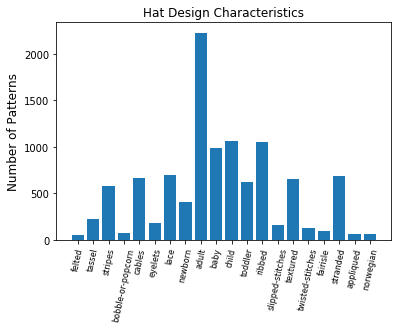

In [89]:
plot_bar_x()

In [3]:
img_data = pd.read_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/img_data_613.csv')

FileNotFoundError: [Errno 2] File b'/Users/ssivek/Insight_Projects/Ravelry_Project/Data/img_data_613.csv' does not exist: b'/Users/ssivek/Insight_Projects/Ravelry_Project/Data/img_data_613.csv'

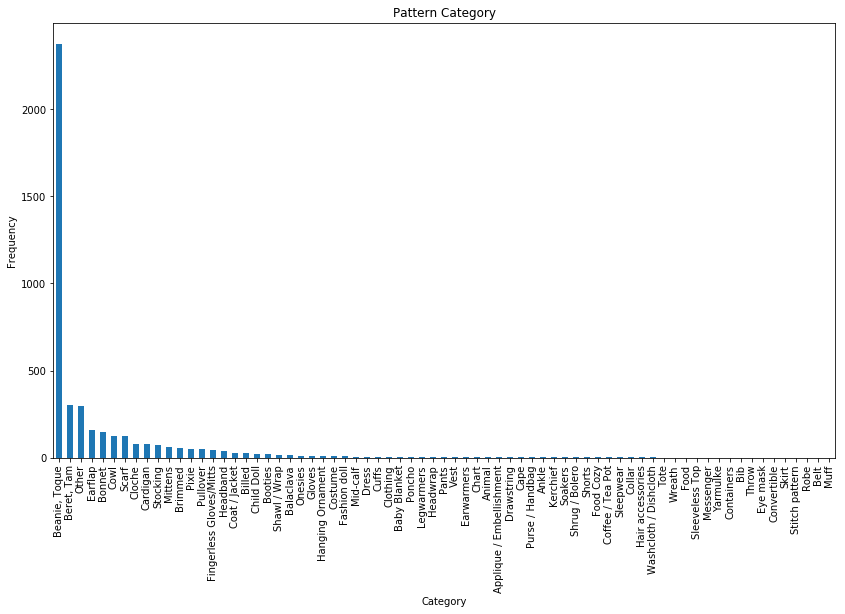

In [91]:
ax = img_data_616['category'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Pattern Category")
ax.set_xlabel("Category")
ax.set_ylabel("Frequency")
plt.show()

In [92]:
img_data_616.columns

Index(['adult', 'appliqued', 'attribute', 'author_name', 'baby',
       'bobble-or-popcorn', 'cables', 'category', 'child', 'extension',
       'eyelets', 'fairisle', 'felted', 'have_img', 'ids_urls', 'lace',
       'medium2_urls', 'medium_url', 'newborn', 'norwegian', 'pattern_id',
       'pattern_name', 'remainder', 'ribbed', 'slipped-stitches', 'stranded',
       'stripes', 'tassel', 'textured', 'toddler', 'twisted-stitches'],
      dtype='object')

In [93]:
img_data_616.drop(columns=['attribute', 'author_name', 'category', 'extension', 'have_img', 'ids_urls', 'medium2_urls', 'medium_url', 'pattern_name', 'remainder'], inplace=True)

/Users/ssivek/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [94]:
img_data_616.columns

Index(['adult', 'appliqued', 'baby', 'bobble-or-popcorn', 'cables', 'child',
       'eyelets', 'fairisle', 'felted', 'lace', 'newborn', 'norwegian',
       'pattern_id', 'ribbed', 'slipped-stitches', 'stranded', 'stripes',
       'tassel', 'textured', 'toddler', 'twisted-stitches'],
      dtype='object')

In [98]:
img_data_616.drop(columns=['filename'], inplace = True)

In [99]:
img_data_616.head()

,adult,appliqued,baby,bobble-or-popcorn,cables,child,eyelets,fairisle,felted,lace,...,norwegian,pattern_id,ribbed,slipped-stitches,stranded,stripes,tassel,textured,toddler,twisted-stitches
0,0,0,0,0,0,0,0,0,0,0,...,0,794220,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,7793,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,7795,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,532083,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,269946,0,0,0,0,0,1,0,0


In [97]:
img_data_616.columns

Index(['adult', 'appliqued', 'baby', 'bobble-or-popcorn', 'cables', 'child',
       'eyelets', 'fairisle', 'felted', 'lace', 'newborn', 'norwegian',
       'pattern_id', 'ribbed', 'slipped-stitches', 'stranded', 'stripes',
       'tassel', 'textured', 'toddler', 'twisted-stitches', 'filename'],
      dtype='object')

In [100]:
filenames = []

for id in img_data_616['pattern_id']:
    a = str(id)
    b = a + '.jpg'
    filenames.append(b)

In [102]:
img_data_616['files'] = filenames

/Users/ssivek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
img_data_616.head()

,adult,appliqued,baby,bobble-or-popcorn,cables,child,eyelets,fairisle,felted,lace,...,pattern_id,ribbed,slipped-stitches,stranded,stripes,tassel,textured,toddler,twisted-stitches,files
0,0,0,0,0,0,0,0,0,0,0,...,794220,0,0,0,0,0,0,0,0,794220.jpg
3,1,0,0,1,0,0,0,0,0,0,...,7793,0,0,0,0,0,1,0,0,7793.jpg
4,0,0,1,0,0,0,0,0,0,0,...,7795,1,0,0,0,0,0,0,0,7795.jpg
5,0,0,0,0,0,0,0,0,0,0,...,532083,0,0,0,0,0,0,0,0,532083.jpg
10,1,0,0,0,0,0,0,0,0,0,...,269946,0,0,0,0,0,1,0,0,269946.jpg


In [104]:
img_data_616.drop(columns=['pattern_id'], inplace = True)

In [105]:
img_data_616.head()

,adult,appliqued,baby,bobble-or-popcorn,cables,child,eyelets,fairisle,felted,lace,...,norwegian,ribbed,slipped-stitches,stranded,stripes,tassel,textured,toddler,twisted-stitches,files
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,794220.jpg
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7793.jpg
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,7795.jpg
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,532083.jpg
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,269946.jpg


In [106]:
filename = img_data_616['files']
img_data_616.drop(labels=['files'], axis=1,inplace = True)
img_data_616.insert(0, 'file', filename)
img_data_616.head()

,file,adult,appliqued,baby,bobble-or-popcorn,cables,child,eyelets,fairisle,felted,...,newborn,norwegian,ribbed,slipped-stitches,stranded,stripes,tassel,textured,toddler,twisted-stitches
0,794220.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7793.jpg,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,7795.jpg,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
5,532083.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,269946.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [107]:
img_data_616.to_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/hat_model_616.csv')

In [6]:
newhist = pd.read_csv('/Users/ssivek/Insight_Projects/Ravelry_Project/Data/hat_model_616.csv')

In [7]:
newhist.head()

,Unnamed: 0,file,adult,appliqued,baby,bobble-or-popcorn,cables,child,eyelets,fairisle,...,newborn,norwegian,ribbed,slipped-stitches,stranded,stripes,tassel,textured,toddler,twisted-stitches
0,0,794220.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,7793.jpg,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,7795.jpg,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,5,532083.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,269946.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
attributes = ['felted', 'tassel', 'stripes', 'bobble-or-popcorn', 'cables', 'eyelets',
              'lace', 'ribbed', 'slipped-stitches', 'textured', 'twisted-stitches', 
              'fairisle', 'stranded', 'appliqued', 'norwegian']

att_totals = []

for att in attributes:
    t = newhist[att].sum()
    att_totals.append(t)
    
print(att_totals)

[55, 224, 577, 74, 664, 178, 699, 1052, 153, 656, 126, 92, 688, 57, 59]


In [11]:
index = np.arange(len(attributes))

In [37]:
def plot_bar_x():
   

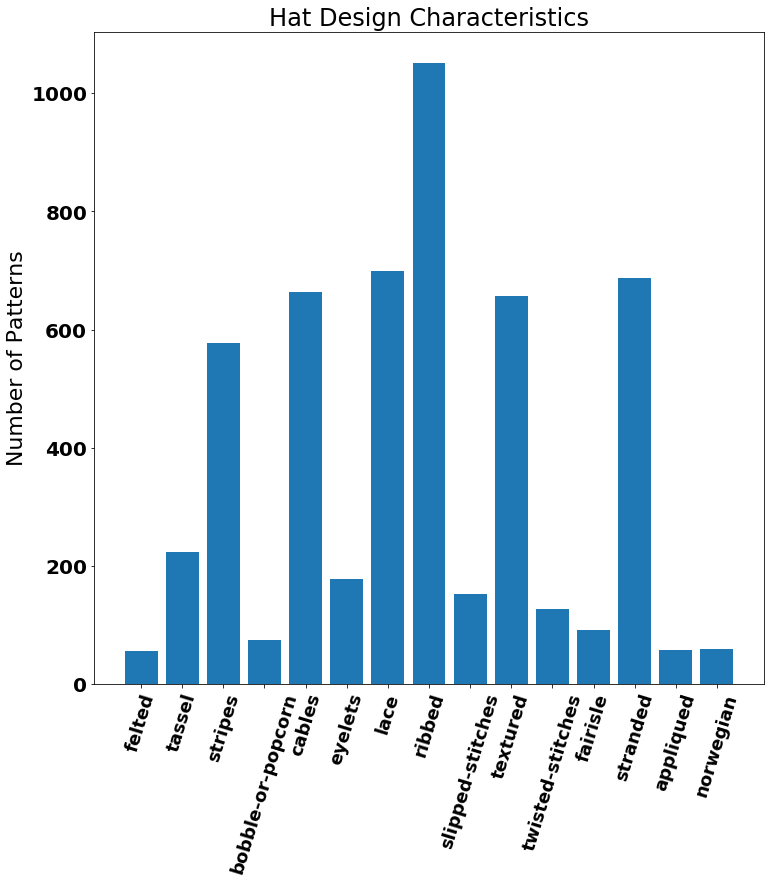

In [51]:
index = np.arange(len(attributes))
plt.figure(figsize=(12,12)) 
plt.bar(index, att_totals)
plt.ylabel('Number of Patterns', fontsize=22)
plt.xticks(index, attributes, fontsize=18, rotation=73)
plt.title('Hat Design Characteristics')
# plt.show()
plt.savefig('attributes.png', dpi=300, bbox_inches='tight')